Dataset loaded successfully!
First 5 rows:
          id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_wo

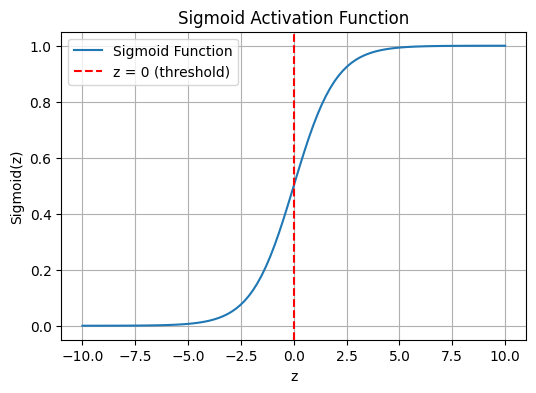

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix, classification_report, roc_auc_score, roc_curve
)

# Load the dataset
df = pd.read_csv("data.csv")
print("Dataset loaded successfully!")
print("First 5 rows:\n", df.head())

# --------------------------
# Step 1: Basic Exploration
# --------------------------
print("\nDataset Info:")
print(df.info())

print("\nMissing values:\n", df.isnull().sum())

print("\nClass distribution:\n", df.iloc[:, -1].value_counts())  # assuming target is in last column

# --------------------------
# Step 2: Data Preprocessing
# --------------------------

# Assuming last column is the target
X = df.iloc[:, :-1]  # Features
y = df.iloc[:, -1]   # Target

# Drop rows where target is NaN
X = X[~y.isna()]
y = y[~y.isna()]

# Encode target if it's not numerical
if y.dtype == 'object':
    y = pd.factorize(y)[0]

# Check shapes before train-test split
print(f"\nShape of X: {X.shape}")
print(f"Shape of y: {y.shape}")
print("Target value counts:\n", pd.Series(y).value_counts())

# Safety check before splitting
if X.shape[0] == 0 or len(np.unique(y)) < 2:
    print("Error: Not enough samples or only one class present in the target. Exiting.")
else:
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    # Standardize features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # --------------------------
    # Step 3: Logistic Regression Model
    # --------------------------
    model = LogisticRegression()
    model.fit(X_train_scaled, y_train)

    # --------------------------
    # Step 4: Evaluation
    # --------------------------
    y_pred = model.predict(X_test_scaled)
    y_proba = model.predict_proba(X_test_scaled)[:, 1]

    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

    # Plot ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    plt.figure(figsize=(8, 5))
    plt.plot(fpr, tpr, label='Logistic Regression')
    plt.plot([0, 1], [0, 1], '--', color='gray')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()
    plt.grid()
    plt.show()

    # --------------------------
    # Step 5: Threshold Tuning
    # --------------------------
    custom_threshold = 0.6
    y_pred_custom = (y_proba >= custom_threshold).astype(int)

    print(f"\nCustom Threshold = {custom_threshold}")
    print(confusion_matrix(y_test, y_pred_custom))
    print(classification_report(y_test, y_pred_custom))

# --------------------------
# Sigmoid Function Visualization
# --------------------------
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

z = np.linspace(-10, 10, 100)
sig = sigmoid(z)

plt.figure(figsize=(6, 4))
plt.plot(z, sig, label="Sigmoid Function")
plt.axvline(0, color='red', linestyle='--', label='z = 0 (threshold)')
plt.xlabel("z")
plt.ylabel("Sigmoid(z)")
plt.title("Sigmoid Activation Function")
plt.legend()
plt.grid()
plt.show()